<a href="https://colab.research.google.com/github/Aditya100300/ML_Projects/blob/master/E_Commerce_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.PREPARE THE PROBLEM

LOAD THE LIBRARIES

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


LOAD DATASET

In [0]:
customers=pd.read_csv('/content/Ecommerce Customers.csv')

2.SUMMARIZE DATA

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


DESCRIPTIVE STATISTICS

In [6]:
customers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [14]:
customers.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

DATA VISUALIZATION

In [2]:
!pip install pandas-profiling[notebook,html]
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.6.0-py2.py3-none-any.whl size=240951 sha256=4629cf73c6a4c30b2d2c3a51dc3d2f184a14c84f01de9ddab7b38db96fd44bf2
  Stored in directory: /tmp/pip-ephem-wheel-cache-pf9q11rd/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [6]:
Profile=ProfileReport(customers)


In [7]:
Profile

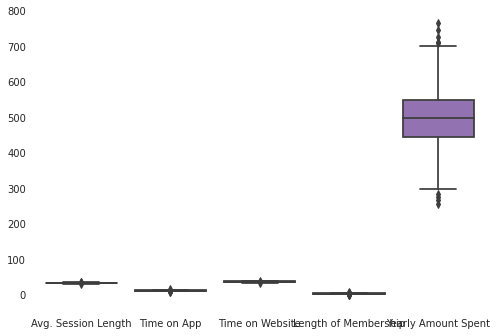

In [9]:
sns.boxplot(data=customers)

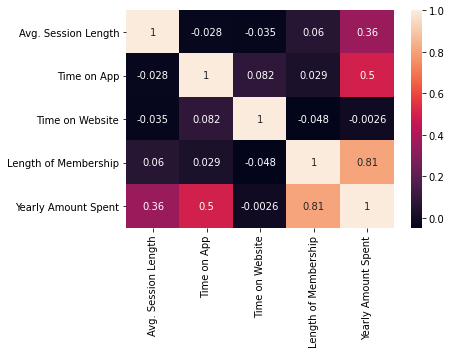

In [7]:
num=[col for col in customers.columns if customers[col].dtype=='float']
cm=np.corrcoef(customers[num].values.T)
hm=sns.heatmap(cm,xticklabels=num,yticklabels=num,annot=True,cbar=True)

In [8]:
customers[num].corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


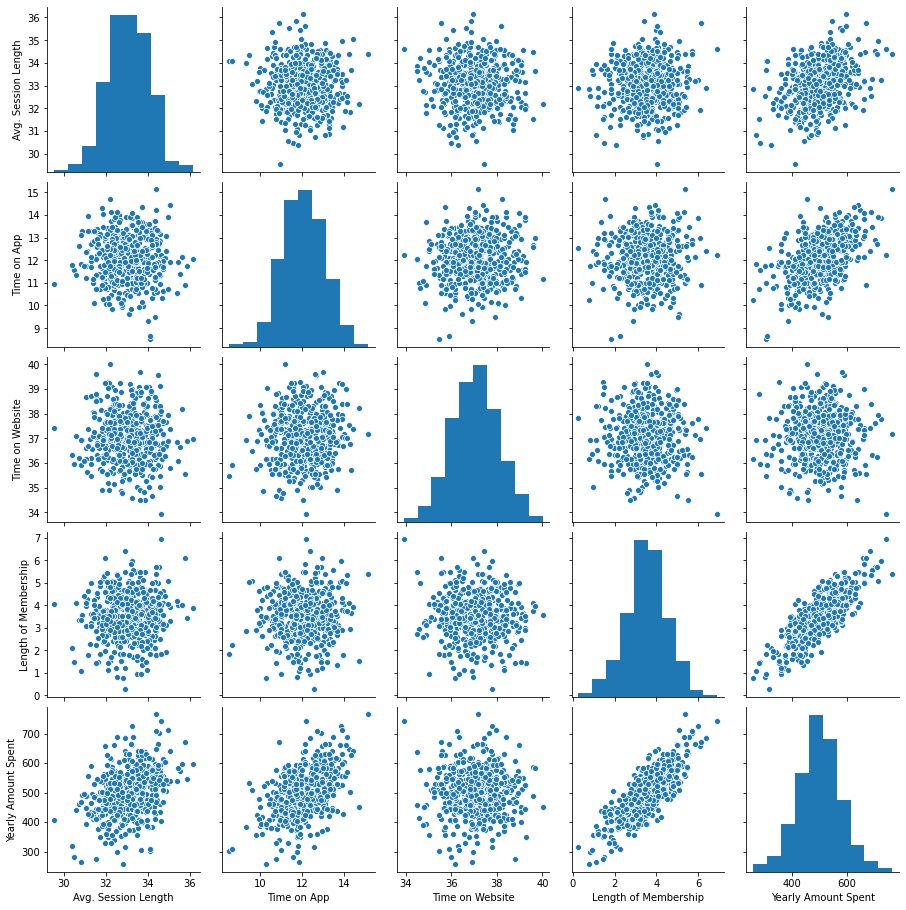

In [9]:
sns.pairplot(customers[num])

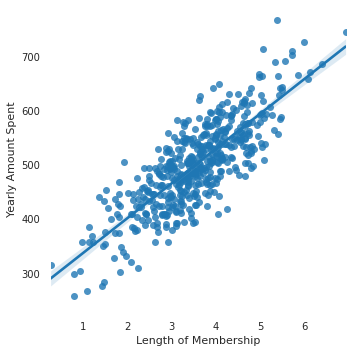

In [48]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

3.PREPARE DATA

FEATURE SELECTION

In [10]:
y=customers['Yearly Amount Spent']
X=customers[num]
X=X.iloc[:,:4]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


4.EVALUATE ALGORITHMS

SPLIT OUT VALIDATION DATASET

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
lr.coef_

array([25.7410798 , 38.74580285,  0.42705225, 61.55736557])

TEST OPTIONS AND EVALUATE METRICS

PREDICTION ON VALID DATASET 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr=LinearRegression()
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)
mae=mean_absolute_error(y_test,prediction)
mqe=mean_squared_error(y_test,prediction)
r2=r2_score(y_test,prediction)
prediction
print(mae)
print(mqe)
print(r2)
print(lr.coef_)
print(lr.intercept_)

6.796975812476797
76.78564914884042
0.9888697688756826
[25.7410798  38.74580285  0.42705225 61.55736557]
-1051.4633552483288


Text(0, 0.5, 'prediction')

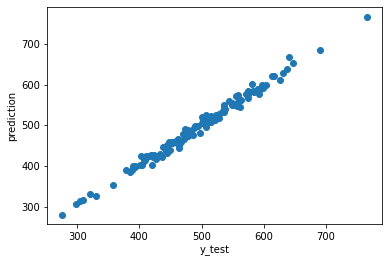

In [15]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [0]:
sns.distplot((y_test-prediction),bins=20)

In [16]:
cdf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.741080
Time on App,38.745803
Time on Website,0.427052
Length of Membership,61.557366


Turning a linear regression model into a curve - polynomial regression¶


In [22]:
from sklearn.preprocessing import PolynomialFeatures
lm=LinearRegression()
pm=LinearRegression()
poly=PolynomialFeatures(degree=2,interaction_only=False)
X_poly=poly.fit_transform(X_train)
X_poly.shape

(375, 15)

In [23]:
lm.fit(X_train,y_train)
p1=lm.predict(X_test)
r2=r2_score(y_test,p1)
r2


0.9888697688756826

In [24]:
pm.fit(X_poly,y_train)
p2=pm.predict(poly.fit_transform(X_test))
r2=r2_score(y_test,p2)
r2

0.9872660007701735

In [0]:
print(pm.coef_)
print(pm.intercept_)

In [131]:
X_poly.shape

(500, 15)

Using regularized methods for Linear Regression

In [0]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.5)
lasso.fit(X_train,y_train)
prediction=lasso.predict(X_test)
print(lasso.coef_)


In [0]:
mae=mean_absolute_error(y_test,prediction)
mqe=mean_squared_error(y_test,prediction)
r2=r2_score(y_test,prediction)
prediction
print(mae)
print(sqe)
print(r2)
print(lr.coef_)
print(lr.intercept_)

In [100]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
prediction=ridge.predict(X_test)
print(ridge.coef_)

[25.70400293 38.69226536  0.42856726 61.47775972]


In [101]:
mae=mean_absolute_error(y_test,prediction)
mqe=mean_squared_error(y_test,prediction)
r2=r2_score(y_test,prediction)
prediction
print(mae)
print(sqe)
print(r2)
print(lr.coef_)
print(lr.intercept_)

6.803639439096528
76.78564914884042
0.9888684512555629
[25.7410798  38.74580285  0.42705225 61.55736557]
-1051.4633552483288


Decision Tree Regression

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
tree=DecisionTreeRegressor(max_depth=10)
tree.fit(X_train,y_train)
prediction=tree.predict(X_test)
r2=r2_score(y_test,prediction)
r2


0.8553327497734386

Random forest regression


In [116]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100,random_state=1)
forest.fit(X_train,y_train)
testprediction=forest.predict(X_test)
trainprediction=forest.predict(X_train)
r2test=r2_score(y_test,testprediction)
r2train=r2_score(y_train,trainprediction)


0.934884970024046

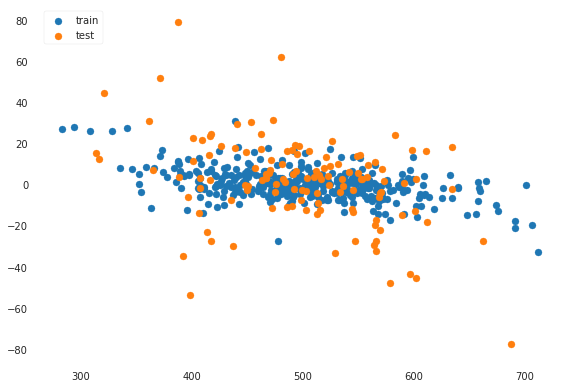

In [125]:
plt.scatter(trainprediction,trainprediction-y_train,label='train')
plt.scatter(testprediction,testprediction-y_test,label='test')
plt.legend(loc='upper left')
plt.tight_layout()


Spot Check Algorithms

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))


In [32]:

results=[]
names=[]
for name,model in models:
  kfold=KFold(n_splits=5,shuffle=True,random_state=5)
  cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='neg_mean_squared_error')
  results.append(cv_results)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


LR: -108.746135 (12.440747)
LASSO: -111.506713 (16.953554)
EN: -823.005263 (92.278745)
KNN: -727.099189 (178.093160)
CART: -947.113010 (279.762637)
SVR: -6004.487105 (786.142740)


Compare Algorithms

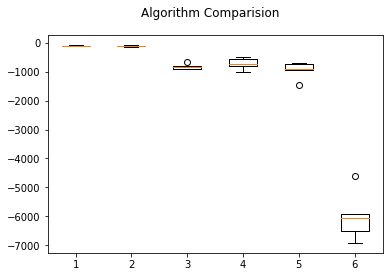

In [38]:
fig=plt.figure()
fig.suptitle('Algorithm Comparision')
plt.boxplot(results)
plt.show()

 Standardize the dataset

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
results=[]
names=[]
new_X=scaler.fit_transform(X_train)
for name,model in models:
  kfold=KFold(n_splits=5,shuffle=True,random_state=5)
  cv_results=cross_val_score(model,new_X,y_train,cv=kfold,scoring='neg_mean_squared_error')
  results.append(cv_results)
  msg="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR: -108.746135 (12.440747)
LASSO: -111.367114 (16.847083)
EN: -793.068211 (87.970114)
KNN: -733.696842 (177.665196)
CART: -916.771411 (275.452829)
SVR: -4087.002170 (700.913894)


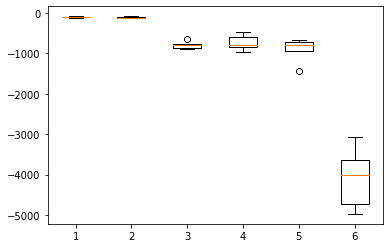

In [43]:
fig=plt.figure()
plt.boxplot(results)
plt.show()